In [1]:
import comet_ml
from comet_ml import query

In [2]:
comet_api = comet_ml.api.API()

In [3]:
mosei_org = comet_api.query("transformer", "reproduce-cmu", query.Tag("attn_a_fixd") & query.Tag("best"))
assert len(mosei_org) == 1
mosei_org = mosei_org[0]

In [4]:
exps = comet_api.query("transformer", "reproduce-cmu", query.Tag("res_fixd"))
assert len(exps) == 13 # 14

In [5]:
org_config = {
    "attn_dropout": 0.1,
    "attn_dropout_a": 0.2,
    "attn_dropout_v": 0.1,
    "out_dropout": 0.1,
    "relu_dropout": 0.1,
    "res_dropout": 0.0,
    "embed_dropout": 0.3
}

In [6]:
def get_param(exp, parameter_name, t):
    return t(exp.get_parameters_summary(parameter_name)["valueCurrent"])
def get_metric(exp, metric_name, t):
    return t(exp.get_metrics_summary(metric_name)["valueMin"]) # valueMin

In [7]:
from termcolor import colored
def print_colored_res(metric_name, smaller_color, greater_color):
    org_metric = get_metric(mosei_org, metric_name, float)
    print(org_metric)
    res = []
    for k, v in org_config.items():
        smaller = None
        larger = None
        for exp in exps:
            param_value = get_param(exp, k, float)
            metric_value = get_metric(exp, metric_name, float)
            color = smaller_color if metric_value < org_metric else greater_color
            if param_value < v:
    #             assert smaller is None
    #             smaller = param_value
                r = (colored(k, color), param_value, metric_value)
                res.append(r)
            elif param_value > v:
    #             assert larger is None
    #             larger = param_value
                r = (colored(k, color), param_value, metric_value)
                res.append(r)
    return res

In [8]:
for f1, mae in zip(print_colored_res("val_F1 score", 'red', 'green'), print_colored_res("val_MAE", 'green', 'red')):
    print(*f1, '\t', *mae)

0.7084846801846707


TypeError: list indices must be integers or slices, not str

In [9]:
import holoviews as hv
hv.extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [12]:
# metric_name, smaller_color, greater_color = "val_F1 score", 'red', 'green'
# metric_name, smaller_color, greater_color = "val_MAE", 'green', 'red'
def plot_from_metric(metric_name):
    org_metric = get_metric(mosei_org, metric_name, float)
    res = []
    p = hv.VLine(org_metric)
    for k, v in org_config.items():
        smaller = None
        larger = None
        for exp in exps:
            param_value = get_param(exp, k, float)
            try:
                metric_value = get_metric(exp, metric_name, float)
            except TypeError:
                continue
#             color = smaller_color if metric_value < org_metric else greater_color
            if param_value < v:
                assert smaller is None
                smaller = metric_value
    #             r = (colored(k, color), param_value, metric_value)
    #             res.append(r)
            elif param_value > v:
                assert larger is None
                larger = metric_value
    #             r = (colored(k, color), param_value, metric_value)
    #             res.append(r)
#         assert smaller is not None
#         assert larger is not None
        k = f"{k} ({v})"
        vs = [(smaller, k), (org_metric, k), (larger, k)]
#         print(vs)
        p *= hv.Curve(vs)
        p *= hv.Points((smaller, k)).opts(marker='v')
        p *= hv.Points((larger, k)).opts(marker='^')
    return p.opts(title=metric_name)

:Overlay
   .VLine.I     :VLine   [x,y]
   .Curve.I     :Curve   [x]   (y)
   .Points.I    :Points   [x,y]
   .Points.II   :Points   [x,y]
   .Curve.II    :Curve   [x]   (y)
   .Points.III  :Points   [x,y]
   .Points.IV   :Points   [x,y]
   .Curve.III   :Curve   [x]   (y)
   .Points.V    :Points   [x,y]
   .Points.VI   :Points   [x,y]
   .Curve.IV    :Curve   [x]   (y)
   .Points.VII  :Points   [x,y]
   .Points.VIII :Points   [x,y]
   .Curve.V     :Curve   [x]   (y)
   .Points.IX   :Points   [x,y]
   .Points.X    :Points   [x,y]
   .Curve.VI    :Curve   [x]   (y)
   .Points.XI   :Points   [x,y]
   .Points.XII  :Points   [x,y]
   .Curve.VII   :Curve   [x]   (y)
   .Points.XIII :Points   [x,y]
   .Points.XIV  :Points   [x,y]
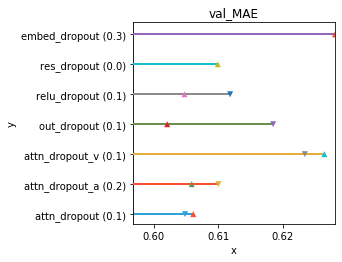

In [13]:
plot_from_metric("val_MAE")